# Continuous Control Project


### 1. Imports

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from ddpg_agent import Agent

### 2. Set up the environment and agent

In [2]:
#set up the unity environment
env = UnityEnvironment(file_name='Reacher_Windows_x86_64\Reacher_Windows_x86_64\Reacher.exe')

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

#set up an agent
agent = Agent(state_size, action_size, random_seed=12)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Train the agent with the DDPG Algorithm


Episode 100	Average Score: 4.03
Episode 200	Average Score: 11.48
Episode 300	Average Score: 18.93
Episode 400	Average Score: 26.77
Episode 449	Average Score: 30.03
Environment solved in 449 episodes!	Average Score: 30.03


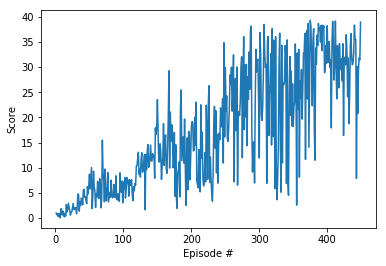

In [5]:
def ddpg(n_episodes=1000, max_t = 1000, print_every=100):
    """Makes the agent act according to DDPG"""
    scores_deque = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        agent.reset()
        state = env_info.vector_observations[0]
        score = 0
        
       
        for t in range(max_t):
            
            action = agent.act(state)
            #env.step returns brainInfo object that contains next_state, reward and done 
            brainInfo = env.step(action)[brain_name]           
            next_state = brainInfo.vector_observations[0]
            reward = brainInfo.rewards[0]
            #true when episode done, otherwise false
            done = brainInfo.local_done[0]
            #pass new observations from brain to agent
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            
            if done:
                break 
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_final.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_final.pth')
            break
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Test the trained Agent

In [ ]:
#watch a smart agent
agent.actor_local.load_state_dict(torch.load('checkpoint_actor_final.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic_final.pth'))

#test agent for one episode
env_info = env.reset(train_mode=False)[brain_name]
state = env_info.vector_observations[0]
score = 0
for t in range(1000):
    action = agent.act(state, add_noise = False)
    #env.step returns brainInfo Object that contains next_state, reward and done 
    brainInfo = env.step(action)[brain_name]
    next_state = brainInfo.vector_observations[0]
    reward = brainInfo.rewards[0]
    #true when episode done, otherwise false
    done = brainInfo.local_done[0]
    agent.step(state, action, reward, next_state, done)
    state = next_state
    score += reward
    if done:
        break 


print("Score: {}".format(score))


C:\Users\Chris\Anaconda3\lib\site-packages\torch\nn\functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


### 5. Close the environment

In [ ]:
env.close()